In [1]:
# 安裝能夠掛載硬碟在 Google Drive
!pip install google.colab

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
# 掛載硬碟
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# 切換目錄 (Colab 預設目錄為 /content，使用 %cd 切換目錄)
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
'''
# PyTorch
https://pytorch.org/

# diffusers
https://github.com/huggingface/diffusers

# Stability AI
https://huggingface.co/stabilityai

# 用來申請授權的範例: stable-diffusion-xl-base-1.0
https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0

# Negative Prompts 全攻略
https://blog.256pages.com/negative-prompts/

# 圖像生成是如何運作？用Pytorch實作Stable Diffusion！
https://edge.aif.tw/express-stable-diffusion/
'''

In [4]:
# 安裝 PyTorch
!pip install torch torchvision torchaudio

In [5]:
# 安裝神經網路相關套件
!pip install transformers accelerate numpy sentencepiece protobuf scipy safetensors invisible_watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.8 MB/s eta 0:00:00


In [6]:
# 安裝 diffusers
!pip install --upgrade diffusers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 40.0 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

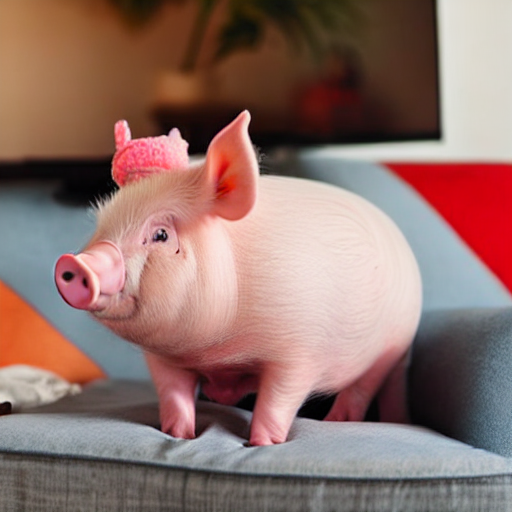

In [7]:
from diffusers import DiffusionPipeline
import torch


model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"

pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")

prompt = '''A cute little pig is sitting on the sofa indoors, watching TV and eating ice cream.'''

pipe(prompt).images[0]

In [3]:
# 清除先前占用 GPU 的記憶體
import gc
pipe = None
image = None
gc.collect()
with torch.no_grad():
    torch.cuda.empty_cache()

In [9]:
# 安裝 Huggingface 套件
!pip install huggingface_hub

In [1]:
from huggingface_hub import notebook_login
notebook_login()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (113 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['with one hand on her hip and the other gently touching her pants. the lighting is soft and frontal, highlighting her features and the texture of her clothing against a muted dark background.']
Token indices sequence length is longer than the specified maximum sequence length for this model (113 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['with one hand on her hip and the other gently touching her pants. the lighting is soft and frontal, highlighting her features and the texture of her clothing against a muted dark background.']


  0%|          | 0/50 [00:00<?, ?it/s]

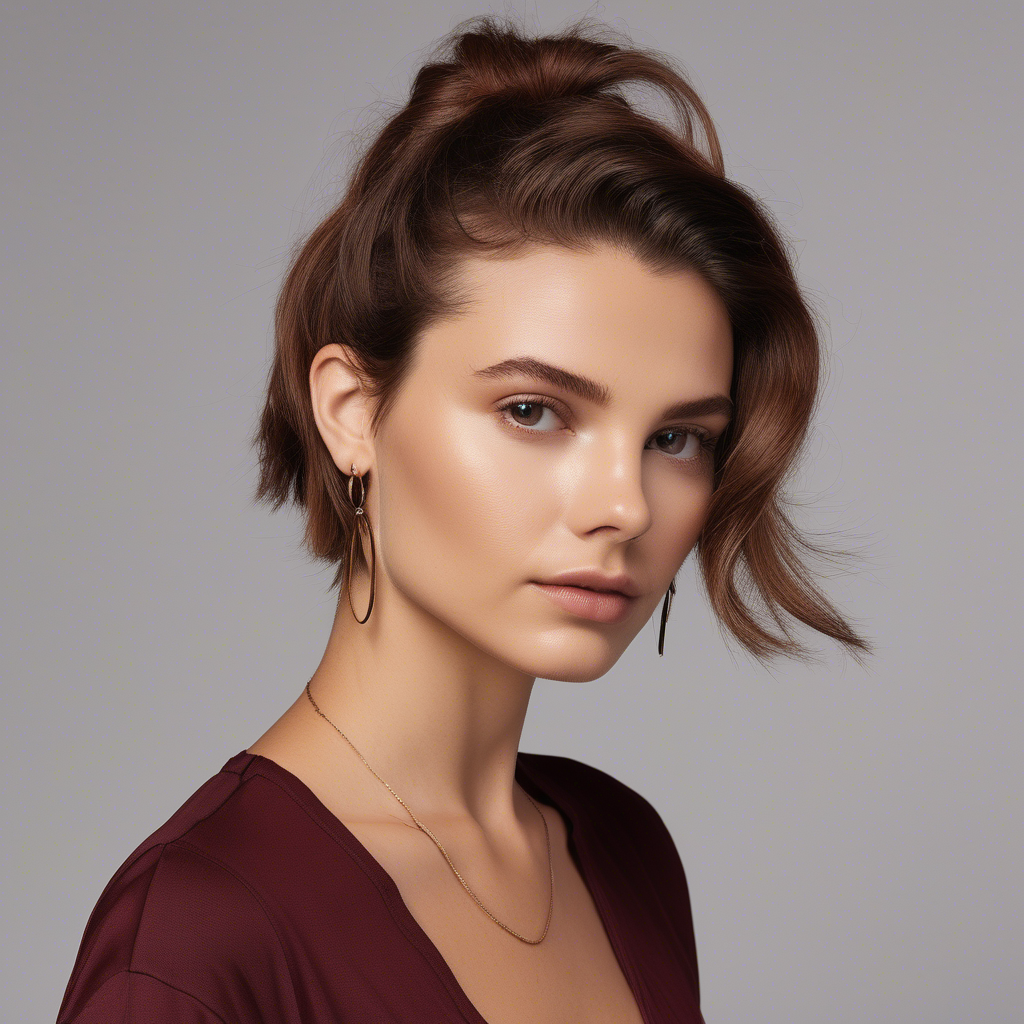

In [2]:
from diffusers import DiffusionPipeline
import torch
import torch._dynamo
torch._dynamo.config.suppress_errors = True

# 模型的代號 (從 Huggingface 取得)
model_id = "stabilityai/stable-diffusion-xl-base-1.0"

# 讀取預訓練模型，並由 pipeline 物件來實作
# (會自動從 Huggingface 下載，要先從 Huggingface 取得 Token)
pipe = DiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)

# 將讀取的模型放到 GPU memory 當中
pipe = pipe.to("cuda")

# 如果 GPU 不夠大，可以部分模型的運算讓 CPU 相關資源來分擔
# pipe.enable_model_cpu_offload()

# 希望圖片生成什麼樣子或情境，通常會是一段描述 + 形容詞或是形容詞 + 名詞
prompt = '''An image of a young woman with a medium complexion and chestnut-colored hair styled in a casual updo with loose strands around her face. She has a natural makeup look with defined eyes and a neutral lip color. She is wearing a fitted, cropped burgundy T-shirt with short sleeves and high-waisted black pants with distinctive button details. She stands confidently, with one hand on her hip and the other gently touching her pants. The lighting is soft and frontal, highlighting her features and the texture of her clothing against a muted dark background.'''


# 把不希望出現在圖片中的元素寫在這裡，通常會是形容詞或是形容詞+名詞
negative_prompt = '''drawing, painting, crayon, sketch, graphite, impressionist, noisy, blurry, soft, deformed, ugly, shallow depth of field, bokeh, (worst quality, low quality, illustration, 3d, 2d, painting, cartoons, sketch) , tooth, dull, blurry, watermark, low quality, (flash:1.2) , black and white, makeup, jewelry, necklace'''

# 使用 pipeline 生成
image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=50,
    width=1024,
    height=1024,
    guidance_scale=7.5,
).images[0]
'''
num_inference_steps：
一般來說，使用的step越多，結果越好，但是step越多，所需的生成時間就越長。
由於Stable Diffusion 在step相對少的情況下效果很好，通常建議使用預設的數值為50。
想要更快的結果，可以使用較小的step；想要更高品質的結果，可以使用更大的數字。

guidance_scale：
Guidance Scale是生成圖片與輸入提示的緊密程度，及輸入的多樣性間的平衡，它的典型值在7.5左右。
增加的比例越多，圖片的質量就越高，但是得到的多樣性就越低。
'''

# 使用 Juypter Notebook 特性來預覽結果
image

# 儲存圖片 (記得先透過 %cd 切換到 /content/drive/My Drive/)
# image.save("./result.png")